# Neural Style Transfer

We will try to do a style transfer by modifying the apple image using the abstract style from another image.

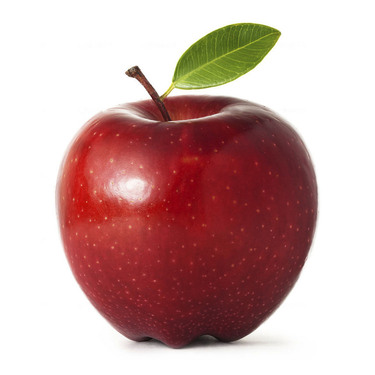

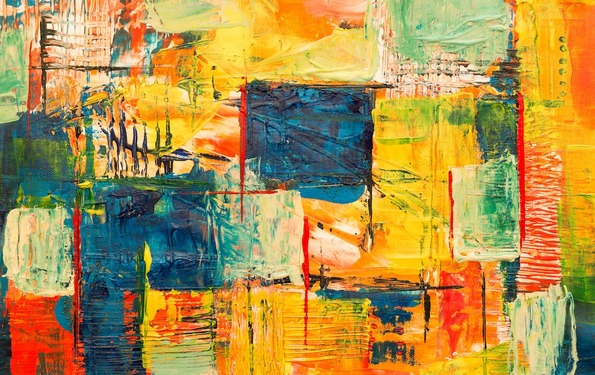

In [1]:
# a function to convert a tensor into an image
import tensorflow as tf
def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor [0]
  return PIL.Image.fromarray(tensor)

In [2]:
# a function to convert an image into a tensor
def image_to_tensor(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

  # resize the image to specific dimensions
  img = tf.image.resize(img, [512, 512])
  img = img[tf.newaxis, :]
  return img

In [3]:
# convert the uploaded images to tensors
apple_tensor = image_to_tensor('/content/Style-transfer_apple.jpg')
abstract_tensor = image_to_tensor('/content/Style-transfer_abstract.jpg')

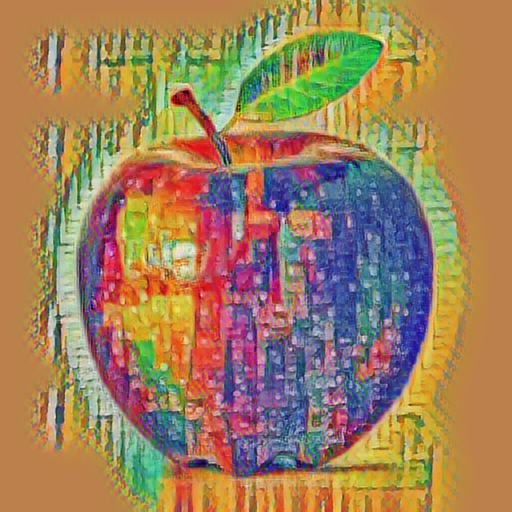

In [5]:
# perform a style transfer on the image and display the result
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(apple_tensor), tf.constant(abstract_tensor))[0]
tensor_to_image(stylized_image)